Greedy dominating set of size ≤ 4: ['E', 'B', 'A']


<Figure size 800x600 with 0 Axes>

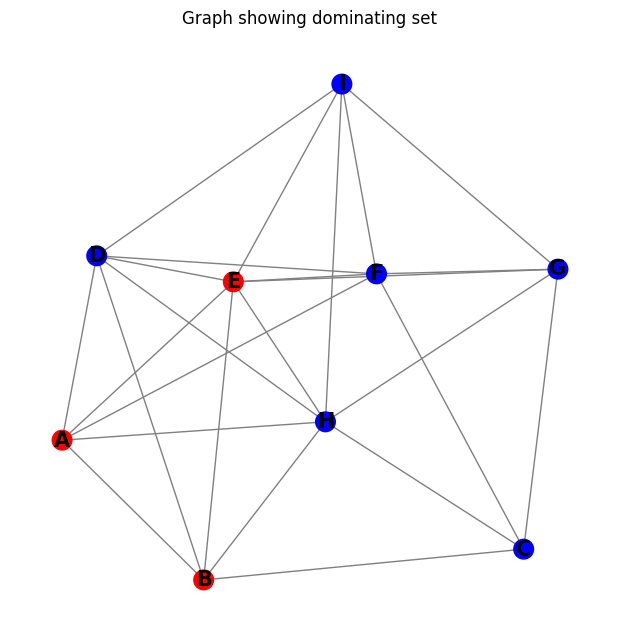

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import heapq
from collections import defaultdict

def greedy_dominating_set(graph, k):
    """Find a small dominating set using a greedy approach."""
    dominating_set = set()
    dominated = set()
    
    while len(dominated) < len(graph):
        best_vertex = None
        max_new_covered = -1
        
        for vertex in graph:
            if vertex not in dominating_set:
                new_covered = {vertex}.union(graph[vertex]) - dominated
                if len(new_covered) > max_new_covered:
                    best_vertex = vertex
                    max_new_covered = len(new_covered)
        
        if best_vertex is None:
            break  # No improvement possible
        
        dominating_set.add(best_vertex)
        dominated.update({best_vertex}.union(graph[best_vertex]))
    
    return list(dominating_set) if len(dominating_set) <= k else None

# Example Usage
if __name__ == "__main__":
    graph = {
        'A': ['B', 'D', 'F', 'E'],
        'B': ['A', 'C', 'D'],
        'C': ['B', 'F'],
        'D':['A', 'I', 'H'],
        'E':['D', 'H', 'G', 'B', 'I'],
        'F':['A', 'E', 'D'],
        'G':['H', 'E', 'F', 'C'],
        'H':['A', 'B', 'C', 'D'],
        'I':['E', 'G', 'H', 'F']
    }
    k = 4
    dominating_set = greedy_dominating_set(graph, k)
    print(f"Greedy dominating set of size ≤ {k}: {dominating_set}")
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G, k=0.5, iterations=50)
    fig = plt.figure(figsize=(8, 6))
    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, with_labels=True, node_color=["red" if node in dominating_set else "blue" for node in G.nodes()], 
        edge_color="gray", node_size=200, font_size=15, font_weight="bold")
    plt.title("Graph showing dominating set")
    plt.show()

In [4]:
def dominating_set_to_minmax_multicenter(graph, k):
    """
    Reduces Dominating Set to Min-Max Multicenter.
    
    Args:
        graph: dictionary in adjacency list
        k: size of the dominating set
    
    Returns:
        A Min-Max Multicenter instance: {
            'vertices': List of vertices,
            'distance_function': Dict of pairwise distances,
            'num_centers': k,
            'target_distance': 1
        }
    """
    vertices = list(graph.keys())
    distance_function = {}
    
    # Construct the distance function
    for u in vertices:
        for v in vertices:
            if u == v:
                distance_function[(u, v)] = 0
            elif v in graph[u]:
                distance_function[(u, v)] = 1
            else:
                distance_function[(u, v)] = 2
    
    return {
        'vertices': vertices,
        'distance_function': distance_function,
        'num_centers': k,
        'target_distance': 1
    }

# Example Usage
if __name__ == "__main__":
    graph = {
        'A': ['B'],
        'B': ['A', 'C'],
        'C': ['B']
    }
    k = 2

    multicenter_instance = dominating_set_to_minmax_multicenter(graph, k)
    
    print("Min-Max Multicenter Instance:")
    print("Vertices:", multicenter_instance['vertices'])
    print("Distance Function:")
    for u in graph:
        for v in graph:
            print(f"d({u}, {v}) = {multicenter_instance['distance_function'][(u, v)]}", end=" | ")
        print()
    print("Number of centers (k):", multicenter_instance['num_centers'])
    print("Target maximum distance (r):", multicenter_instance['target_distance'])

Min-Max Multicenter Instance:
Vertices: ['A', 'B', 'C']
Distance Function:
d(A, A) = 0 | d(A, B) = 1 | d(A, C) = 2 | 
d(B, A) = 1 | d(B, B) = 0 | d(B, C) = 1 | 
d(C, A) = 2 | d(C, B) = 1 | d(C, C) = 0 | 
Number of centers (k): 1
Target maximum distance (r): 1
